In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/sample_data/employee_records.csv")

# Display first few rows
print(df.head())


   Employee_ID    Employee_Name  Age    Country Department    Position  \
0            1    Daniel Taylor   25         UK         HR     Analyst   
1            2      Ethan Brown   44      India  Marketing   Executive   
2            3  Sophia Martinez   51      Japan    Finance   Developer   
3            4   Ethan Martinez   47    Germany    Support     Analyst   
4            5        Mia Brown   32  Australia    Support  Consultant   

      Salary Joining_Date  
0  142278.32   2023-06-04  
1   98549.20   2018-01-13  
2   85565.84   2015-04-30  
3   34513.67   2015-06-17  
4   45339.72   2019-02-22  


In [5]:
df['IsManager'] = df['Position'].str.contains('Manager|Executive|Lead|Head', case=False, na=False)
df.head()

,Employee_ID,Employee_Name,Age,Country,Department,Position,Salary,Joining_Date,IsManager
0,1,Daniel Taylor,25,UK,HR,Analyst,142278.32,2023-06-04,False
1,2,Ethan Brown,44,India,Marketing,Executive,98549.20,2018-01-13,True
2,3,Sophia Martinez,51,Japan,Finance,Developer,85565.84,2015-04-30,False
3,4,Ethan Martinez,47,Germany,Support,Analyst,34513.67,2015-06-17,False
4,5,Mia Brown,32,Australia,Support,Consultant,45339.72,2019-02-22,False


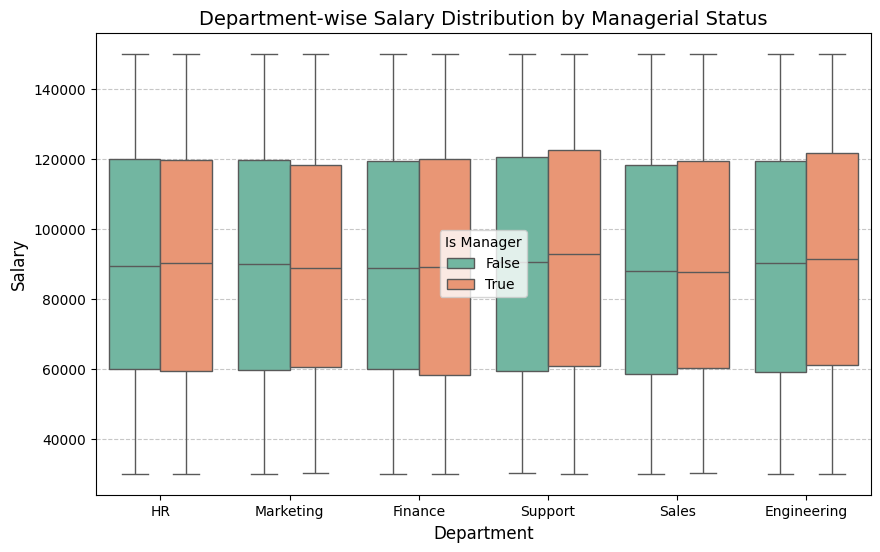

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', hue='IsManager', data=df, palette='Set2')

plt.title('Department-wise Salary Distribution by Managerial Status', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.legend(title='Is Manager')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


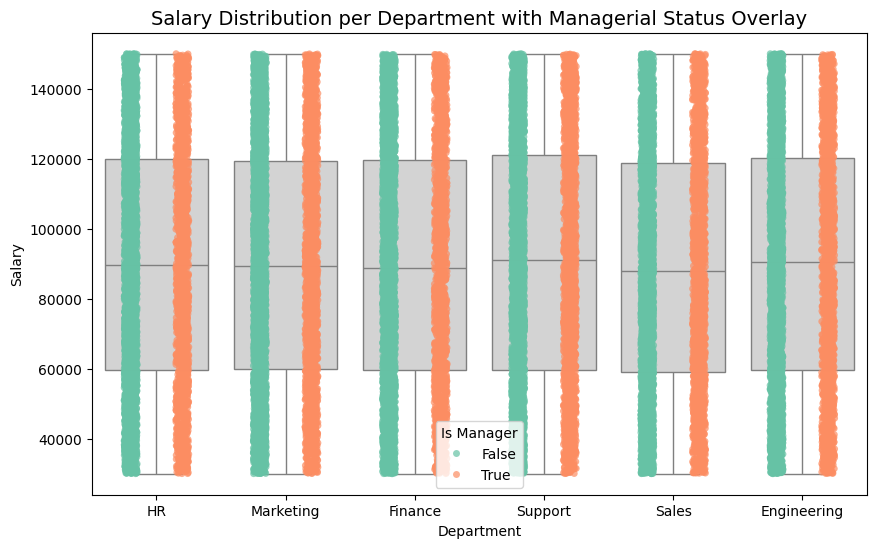

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='Salary', data=df, showfliers=False, color='lightgray')
sns.stripplot(x='Department', y='Salary', data=df, hue='IsManager',
              jitter=True, dodge=True, alpha=0.7, palette='Set2')

plt.title('Salary Distribution per Department with Managerial Status Overlay', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Salary')
plt.legend(title='Is Manager')
plt.show()


In [8]:
summary = df.groupby(['Department', 'IsManager'])['Salary'].describe()[['min', '25%', '50%', '75%', 'max']]
print(summary)


                            min         25%        50%          75%        max
Department  IsManager                                                         
Engineering False      30004.78  59204.9500  90136.195  119404.9100  149989.60
            True       30066.26  61020.4425  91357.665  121496.5600  149806.56
Finance     False      30019.60  59820.7800  88794.495  119443.1750  149841.52
            True       30053.71  58240.0800  89154.265  120016.1950  149790.68
HR          False      30021.75  59796.1500  89272.000  119995.3200  149995.00
            True       30037.83  59450.0850  90228.630  119702.0600  149994.40
Marketing   False      30024.84  59701.5000  89784.260  119735.0800  149908.71
            True       30101.04  60467.0625  88663.525  118069.6350  149953.43
Sales       False      30017.91  58355.8650  88011.970  118341.1050  149996.39
            True       30155.83  60141.2500  87592.200  119280.0800  149979.37
Support     False      30081.39  59349.2925  90404.7